gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.99      1.00      0.99       190

    accuracy                           0.99       200
   macro avg       0.99      0.90      0.94       200
weighted avg       0.99      0.99      0.99       200



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Result: 1


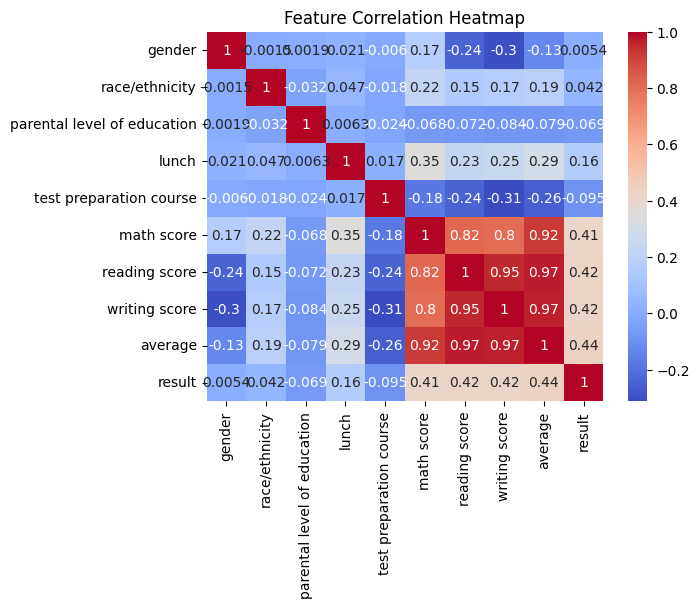

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("StudentsPerformance.csv")
df.head()
# Check for nulls
print(df.isnull().sum())

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
# Average of 3 subjects
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Result = 1 if average ≥ 40 else 0
df['result'] = df['average'].apply(lambda x: 1 if x >= 40 else 0)

df.head()
X = df.drop(['average', 'result'], axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Example: Predict for new student
sample = np.array([[0,1,1,1,3,72,90,88]])  # Example values
sample = sample.reshape(1, -1)
print("Predicted Result:", model.predict(sample)[0])  # 1 = Pass, 0 = Fail
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

